<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Year                                                                                                 30 non-null     int64  
 1   Unnamed: 1                                                                                           0 non-null      float64
 2   Ticarət, nəqliyyat vasitələrinin təmiri və onlara texniki xidmət müəssisələrinin sayı, vahid (ədəd)  30 non-null     float64
 3   Əşya, ərzaq və qarışıq məhsullar üzrə bazar və yarmarkaların sayı, vahid (ədəd)                      30 non-null     float64
 4   Bazarlarda və yarmarkalarda ticarət yerlərinin sayı, vahid (ədəd)                                    30 non-null     float64

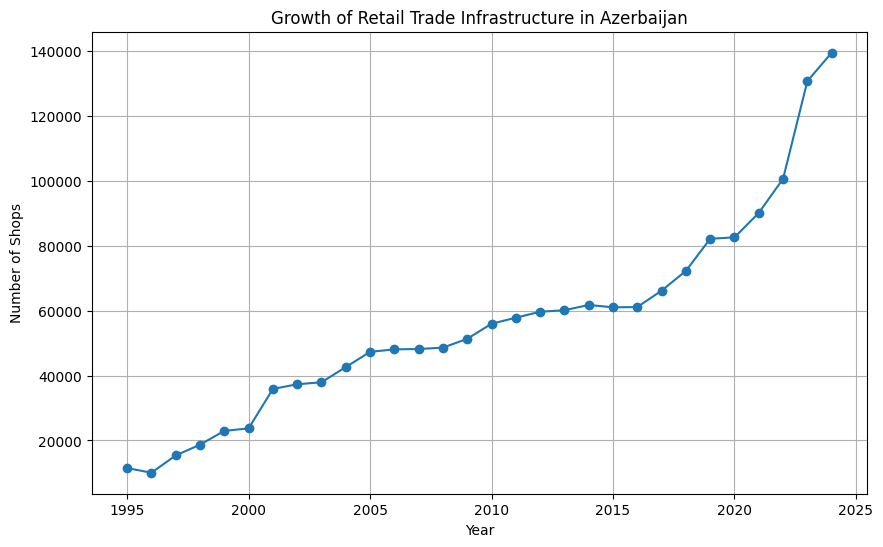

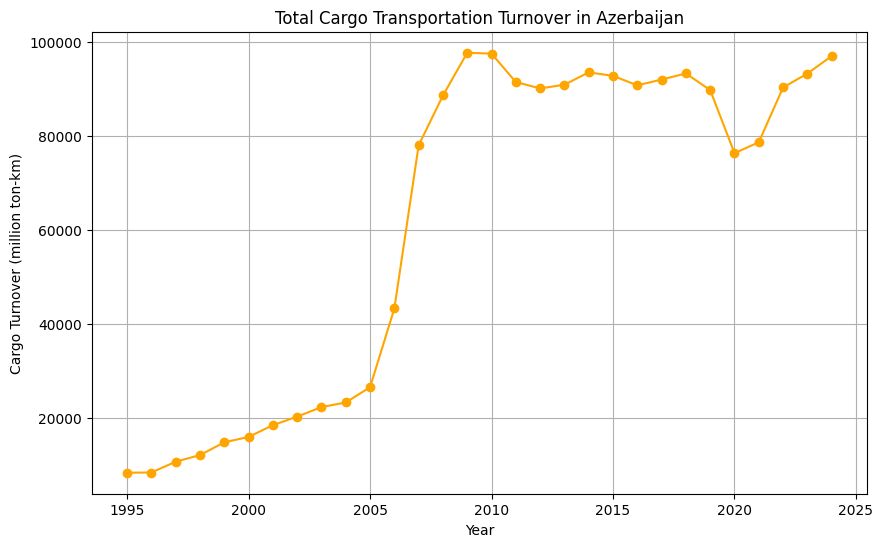

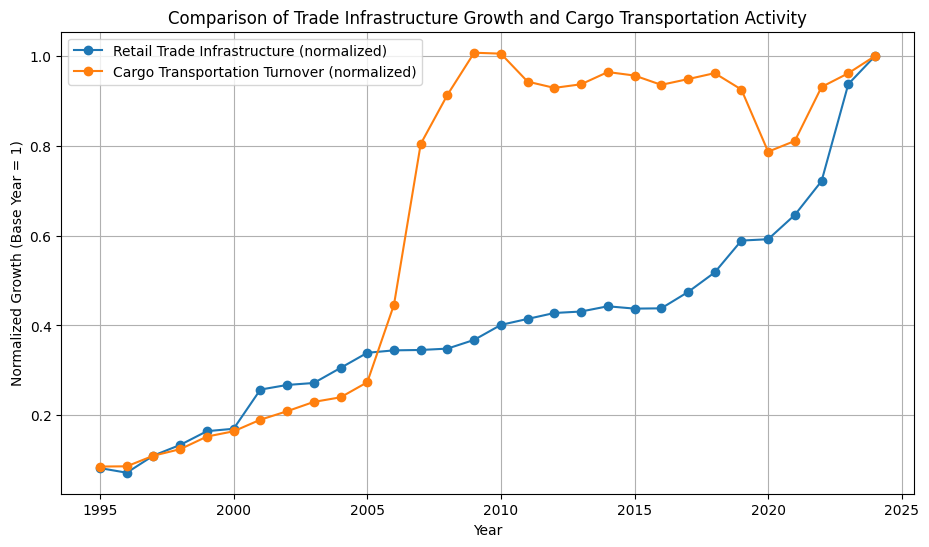

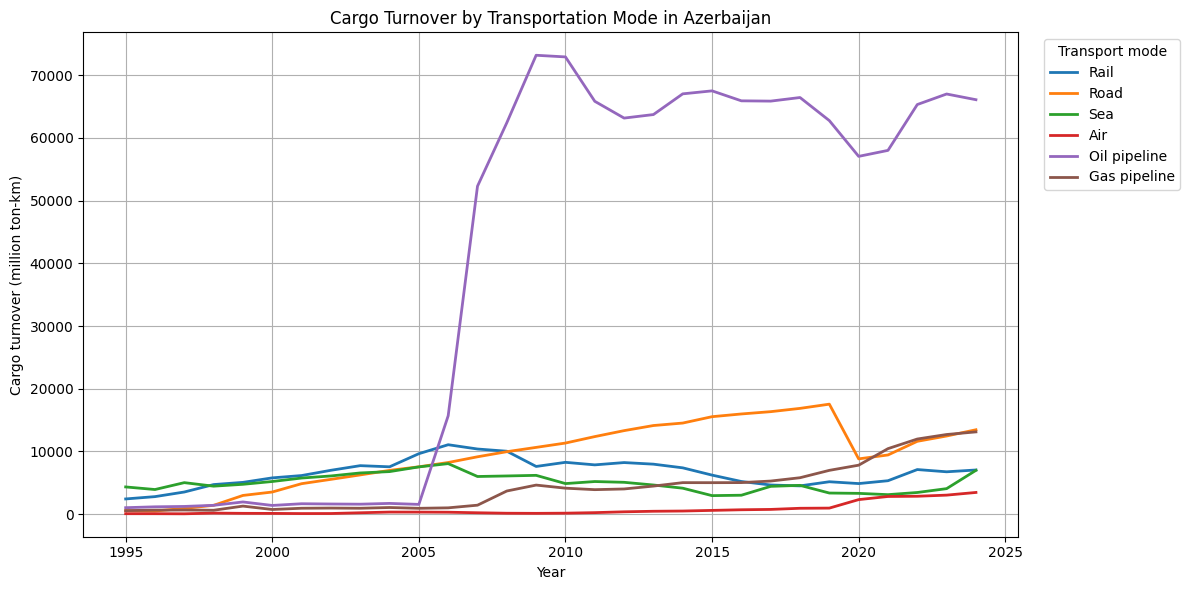

In [ ]:
#Foreign trade and Cargo transportation in Azerbaijan (Trends)
#Objective is if the growth in trade-related economic field in Azerbaijan has been accompanied by the same level of increase in cargo transportation capacity.

import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


trade = pd.read_csv("../datasets/ticartin-umumi-gostricilri-dt_bg_001.csv")
cargo = pd.read_csv("../datasets/nqliyyat-sektorunda-yuk-dovriyysi-milyon-ton-km-dt_bj_015.csv")

trade.head()
trade.columns
trade.info()

cargo.head()
cargo.columns
cargo.info()

trade = trade.drop(columns=["Unnamed: 1"])
cargo = cargo.drop(columns=["Unnamed: 1"])

trade = trade.rename(columns={"Mağazaların sayı, vahid (ədəd)": "number_of_shops"})
cargo = cargo.rename(columns={"Cəmi (mln. ton/km)": "total_cargo_turnover"})
trade[["Year", "number_of_shops"]].head()
cargo[["Year", "total_cargo_turnover"]].head()

plt.figure(figsize=(10,6))
plt.plot(trade["Year"], trade["number_of_shops"], marker="o")
plt.title("Growth of Retail Trade Infrastructure in Azerbaijan")
plt.xlabel("Year")
plt.ylabel("Number of Shops")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(cargo["Year"], cargo["total_cargo_turnover"], marker="o", color="orange")
plt.title("Total Cargo Transportation Turnover in Azerbaijan")
plt.xlabel("Year")
plt.ylabel("Cargo Turnover (million ton-km)")
plt.grid(True)
plt.show()


## Cargo Transportation Growth Stabilized Earlier Than Retail Trade Expansion
# The data shows that total cargo transportation turnover in Azerbaijan experienced
# rapid growth during the mid-2000s, followed by a long period of stabilization.
# In contrast, the number of retail trade establishments continued to grow steadily
# and accelerated sharply after 2018.
# This indicates that transportation capacity expansion preceded the later surge
# in domestic trade infrastructure, rather than evolving simultaneously.


## Trade Infrastructure Growth Outpaced Transport Expansion After 2018
# While the number of retail shops increased significantly in recent years,
# cargo transportation turnover grew at a slower pace and showed greater sensitivity
# to external shocks, particularly in 2020.
# This divergence suggests that recent growth in domestic trade activity may rely
# more on existing logistics capacity rather than new transportation expansion.

trade_norm = trade.copy()
cargo_norm = cargo.copy()

trade_norm["shops_norm"] = (
    trade_norm["number_of_shops"] / trade_norm["number_of_shops"].iloc[0])

cargo_norm["cargo_norm"] = (
    cargo_norm["total_cargo_turnover"] / cargo_norm["total_cargo_turnover"].iloc[0])


plt.figure(figsize=(11,6))
plt.plot(trade_norm["Year"], trade_norm["shops_norm"],
         label="Retail Trade Infrastructure (normalized)", marker="o")
plt.plot(cargo_norm["Year"], cargo_norm["cargo_norm"],
         label="Cargo Transportation Turnover (normalized)", marker="o")

plt.title("Comparison of Trade Infrastructure Growth and Cargo Transportation Activity")
plt.xlabel("Year")
plt.ylabel("Normalized Growth (Base Year = 1)")
plt.legend()
plt.grid(True)
plt.show()

## Final notes
# The comparison reveals that transportation capacity growth does not keep pace
# with the rapid expansion of domestic trade infrastructure in recent years.
# While cargo transportation expanded earlier, retail trade activity intensified
# later, particularly after 2018.
# This suggests a growing reliance on existing logistics capacity, which may
# become a limiting factor for future trade efficiency if not addressed through
# infrastructure investment.



mode_cols = [
    "Dəmir yolu (mln. ton/km)",
    "Avtomobil (mln. ton/km)",
    "Dəniz (mln. ton/km)",
    "Hava (mln. ton/km)",
    "Boru kəməri (mln. ton/km)",
    "qaz kəməri (mln. ton/km)"
]


existing_mode_cols = [c for c in mode_cols if c in cargo.columns]
cargo_long = cargo[["Year"] + existing_mode_cols].copy()
for c in existing_mode_cols:
    cargo_long[c] = (
        cargo_long[c].astype(str)
        .str.replace(",", ".", regex=False)
        .str.replace(" ", "", regex=False)
    )
    cargo_long[c] = pd.to_numeric(cargo_long[c], errors="coerce")

cargo_long = cargo_long.melt(
    id_vars="Year",
    value_vars=existing_mode_cols,
    var_name="Transport mode",
    value_name="Cargo turnover (million ton-km)"
)


cargo_long["Transport mode"] = cargo_long["Transport mode"].replace({
    "Dəmir yolu (mln. ton/km)": "Rail",
    "Avtomobil (mln. ton/km)": "Road",
    "Dəniz (mln. ton/km)": "Sea",
    "Hava (mln. ton/km)": "Air",
    "Boru kəməri (mln. ton/km)": "Oil pipeline",
    "qaz kəməri (mln. ton/km)": "Gas pipeline"
})


plt.figure(figsize=(12,6))
sns.lineplot(
    data=cargo_long,
    x="Year",
    y="Cargo turnover (million ton-km)",
    hue="Transport mode",
    linewidth=2
)

plt.title("Cargo Turnover by Transportation Mode in Azerbaijan")
plt.xlabel("Year")
plt.ylabel("Cargo turnover (million ton-km)")
plt.legend(title="Transport mode", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


